Let's make a metric that lets us quantify the uncertainty in a shape measured off a serries of images

For the systematic. It might make sense to assume a perfectly circular object, then compute the SNR on a systematic effect, say, a stretch in the x-dimension. 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [ ]:
class Size_precision_metric(metrics.BaseMetric):
    """
    
    Parameters
    ----------
    pixscale : float (0.2)
        The pixelscale of the CCD, arsec/pix (0.2).
    fwhm_object : float (3.)
        The FWHM of the fiducial object who's shape is being measured, arcseconds (3.).
    
        
    stellar_density_limit : float (None)
        XXX--to add, put in a limit where if the stellar density is too high, returns weight of 0.
    
    """
    
    def __init__(self,seeingCol='seeingFwhmGeom', metricName=None, pixscale=0.2, 
                 fwhm_object=3., peak_flux_object=100., stellar_density_limit=None,
                 filters='gri', filterCol='filter', stellar_ref_peak=5000.,
                 m5Col='fiveSigmaDepth', maps=['StellarDensityMap', 'DustMap'], 
                 return_weights=False, **kwargs):
        self.seeingCol = seeingCol
        self.m5Col = m5Col
        self.pixscale = pixscale
        self.fwhm_object = fwhm_object
        self.peak_flux_object = peak_flux_object
        self.filterCol = filterCol
        self.return_weights = return_weights
        self.stellar_ref_peak = stellar_ref_peak
        cols =[seeingCol, m5Col, filterCol]
        super().__init__(col=cols, maps=maps, units=units, metricName=metricName, **kwargs)
        
    def run(self, dataSlice, slicepoint=None):
        peak_fluxes = dataSlice[self.seeingCol]*0
        for filtername in self.filters:
            # XXX--apply dust extinction to the peak flux
            # XXX--apply airmass extinction to the peak fluxes
            
        
        # Let's use the simple equation from: http://articles.adsabs.harvard.edu//full/1992PASP..104.1104L/0001105.000.html
        sigma_fwhm_object_predeconv = 1.4*self.fwhm_object*(self.pixscale/self.fwhm_object)**0.5*noise_at_peak/peak_fluxes
        
        # compute the uncertainty in the shape of a psf from a star on the image. Not going to bother with dust and airamss on this
        sigma_fwhm_refstar = xxx
        
        sigma_fwhm_object = (sigma_fwhm_object_predeconv**2 + sigma_fwhm_refstar**2)**0.5
        if self.return_weights:
            return 1./sigma_fwhm_object**2
        else:
            result = # xxx-sum up the uncertainties properly
            return result
        
class Systematic_angle_metric(metrics.BaseMetric):
    """Compute how strongly systematics are canceled in a serries of shape observations
    """
    
    def __init__(self, angleCol='rotTelPos', mod=90., shape_metric=None,
                 **kwargs):
        if shape_metric is None:
            self.shape_metric = Shape_precision_metric(return_weights=True)
        
        self.mod = np.radians(mod)
        self.angleCol = angleCol
        super().__init__(col=cols, maps=maps, units=units, metricName=metricName, **kwargs)
        
    def run(self, dataSlice, slicepoint=None):
        weights = self.shape_metric(dataSlice, slicepoint=slicePoint)
        angles = dataSlice[self.angleCol] % self.mod
        # factor of 2 to make range between 0-180 deg. 
        x_val = np.cos(angles*2)
        # Compute the weighted mean
        x_wmean = np.sum(x_val*weights)/np.sum(weights)
        
        # Could do systematic in x and systematic at 45 degrees (I think uncert in x and y will be same)
        
        
    

In [33]:
## Suppose we have an object with an axial ratio of 2/1
a=2.
b=1.

theta = np.radians(np.arange(0,360.,1))

a_x = a*np.cos(theta)
a_y = a*np.sin(theta)

b_x = b*np.sin(theta)
b_y = b*np.cos(theta)

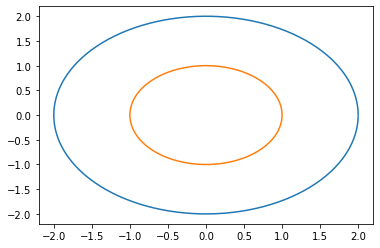

In [34]:
plt.plot(a_x, a_y)
plt.plot(b_x, b_y)

In [35]:
# Now we introduce a systematic that distorts the x-axis to be 5% larger than it should be
d=1.05
a_dx = a_x*d
b_dx = b_x*d

In [36]:
a_d = (a_dx**2+a_y**2)**.5
b_d = (b_dx**2+b_y**2)**.5

Text(0, 0.5, 'a/b (should be 2)')

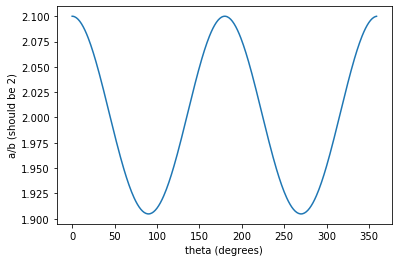

In [40]:
plt.plot(np.degrees(theta), a_d/b_d)
plt.xlabel('theta (degrees)')
plt.ylabel('a/b (should be 2)')

In [ ]:
# So, fitting a sin wave of unknown phase. I think the best way would be to check 1) is the phase coverage adequate and 
# 2) what would be the uncertainty on the amplitude say, if everything was at amplitude 1/2, since that's what it would be on average
